In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from explore import group_tenure, group_monthly_charges

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,Unnamed: 0,customer_id,churn,tenure,tenure_months,tenure_nml,monthly_charges,monthly_charges_nml,total_charges,total_charges_nml,...,device_protection_enc,tech_support_enc,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto
0,5691,5762-TJXGK,No,52,4.33,0.559592,58.75,-0.270565,3038.55,0.485586,...,1,0,1,1,1,0,0,1,0,1
1,6232,6242-FEGFD,No,66,5.50,1.073988,96.60,0.971152,6424.25,1.453931,...,1,1,0,0,0,0,1,0,0,0
2,5807,7359-SSBJK,Yes,64,5.33,0.967422,70.20,-0.036837,4481.00,0.819781,...,0,1,1,0,1,0,0,0,1,1
3,2746,7024-OHCCK,Yes,2,0.17,-1.220640,93.85,0.787436,170.85,-1.011789,...,0,0,1,1,1,1,0,0,0,0
4,3143,9054-FOWNV,No,22,1.83,-0.216904,88.75,0.601211,1885.15,0.191240,...,1,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4056,3229-USWAR,No,34,2.83,0.114185,79.95,0.270877,2727.30,0.403571,...,1,1,1,1,1,0,0,1,0,1
1405,1026,8260-NGFNY,Yes,1,0.08,-1.639976,25.20,-0.790280,25.20,-1.827977,...,0,0,0,0,0,0,1,0,0,0
1406,2386,5334-JLAXU,No,60,5.00,0.799083,94.10,0.799083,5475.90,1.070816,...,0,0,0,1,1,0,0,0,1,1
1407,1776,2674-MIAHT,No,4,0.33,-0.967422,80.30,0.289947,324.20,-0.775553,...,0,0,0,0,1,0,1,0,0,0


# Data Exploration
- Goal: Answer key questions
    1. If a group is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? 
        - (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers))
    2. Are there features that indicate a higher propensity to churn? 
        - like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?
    3. Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?
    4. If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?
    5. Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? 
        - (Use a t-test to answer this.)
    6. How much of monthly_charges can be explained by internet_service_type? 
        - (hint: correlation test). 
    7. How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). 


### Hypotheses:
1. Are there clear groupings in tenure where a customer is more likely to churn? 
    - $H_0$: There are no cohorts who have a higher rate of churn than other cohorts
    - $H_a$: There is a cohort with a higher rate of churn than others

2. Are there features that indicate a higher propensity to churn? 
    - $H_0$: There are no features who have a higher rate of churn than other features
    - $H_a$: Senior citizens have a higher rate of churn 
    - $H_a$: Month-to-month contracts have a higher rate of churn 
    - $H_a$: Two-year contracts have a higher rate of churn
    - $H_a$: People that pay by electronic check have a higher rate of churn 
    - $H_a$: 

3. Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point?
    - $H_0$: There is no price threshold for specific services where the likelihood of churn increases
    - $H_a$: Higher price phone services are more likeley to churn

4. If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?
    - $H_0$: Month-to-month customers and 1-year contract customers are equally likely to churn after the 12th month
    - $H_a$: Month-to-month customers are more likely to churn after the 12th month than 1-year contract customers
    - $H_a$: 1-year contract customers are more likely to churn after the 12th month than month-to-month customers

In [4]:
train.shape

(1409, 32)

#### Group tenure into catagories

In [5]:
train = group_monthly_charges(train)
train.monthly_charges_group.value_counts()

more_then_eighty       549
sixty_one to eighty    288
twenty_one to forty    223
forty_one to sixty     207
zero to twenty         142
Name: monthly_charges_group, dtype: int64

In [6]:
train = group_tenure(train)
train.tenure_group.value_counts()

one_year       438
six_years      291
two_years      188
three_years    171
five_years     167
four_years     154
Name: tenure_group, dtype: int64

### Plot tenure and monthly_charges 
- for each level of internet service
- hue by churn

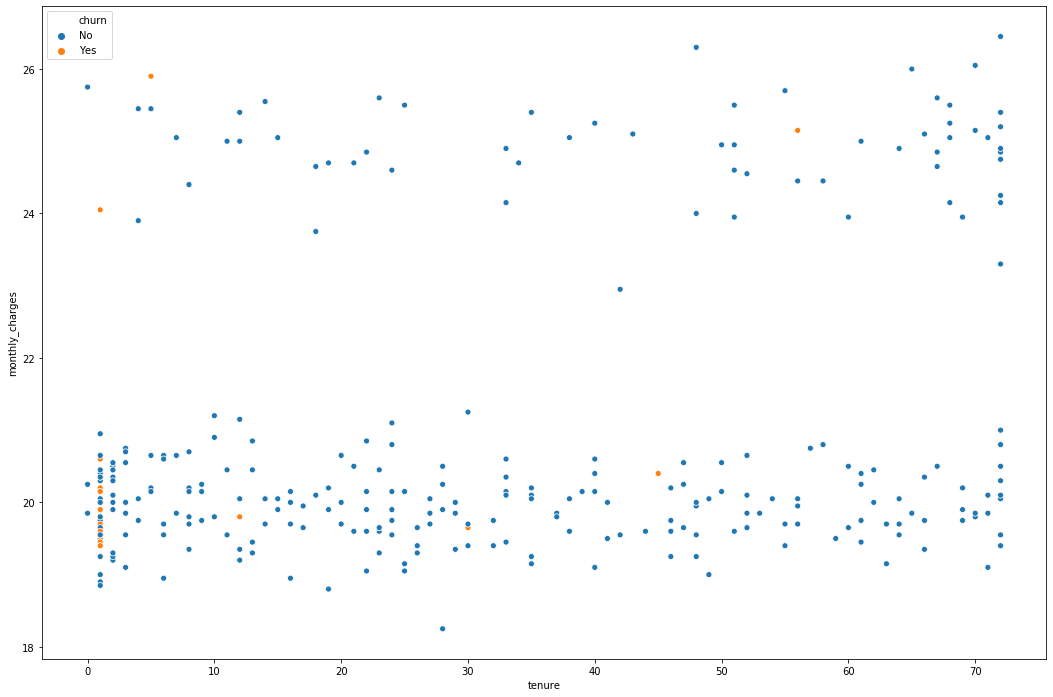

In [7]:
# internet_services == 0 
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 0], hue='churn')

- phone service only: 
    - while there are a few, there have a low churn rate

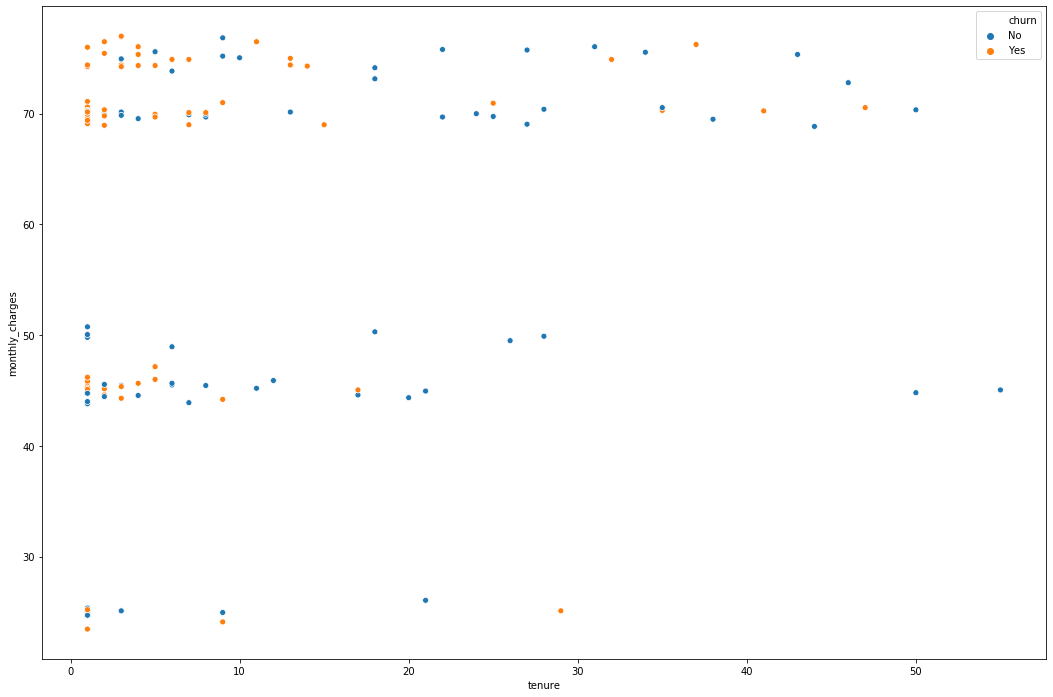

In [8]:
# internet_services == 1
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 1], hue='churn')

- one internet service: 
    - the churn rate has increased as monthly charges increase

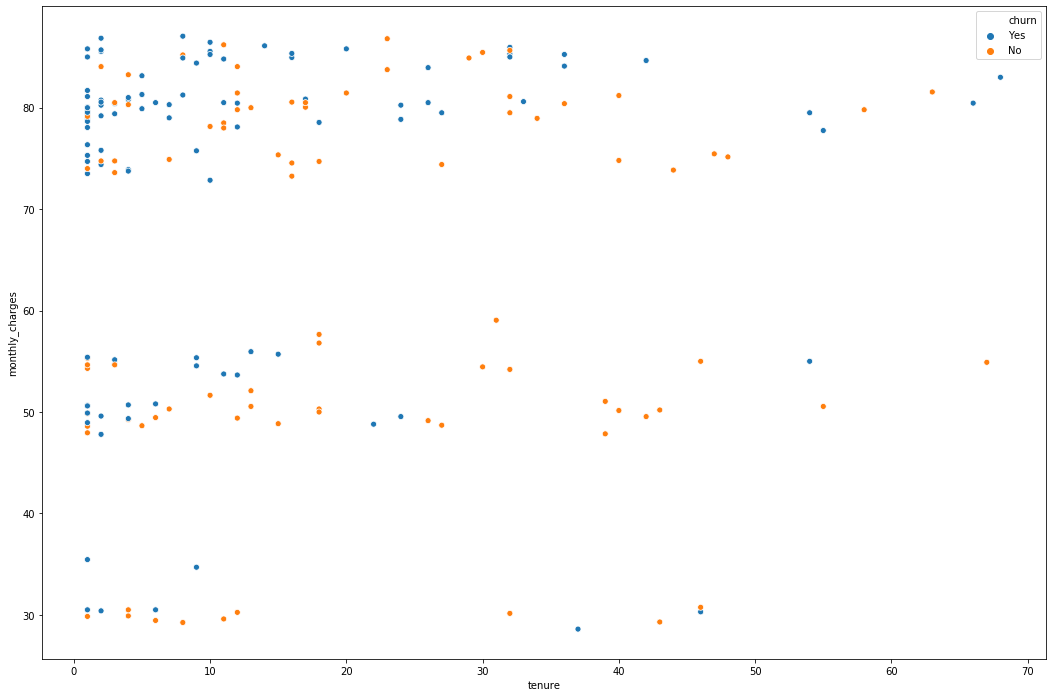

In [9]:
# internet_services == 2
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 2], hue='churn')

- two internet services:
    - the churn rate has not changed from one service, 
    - but churn numbers increase with account increase

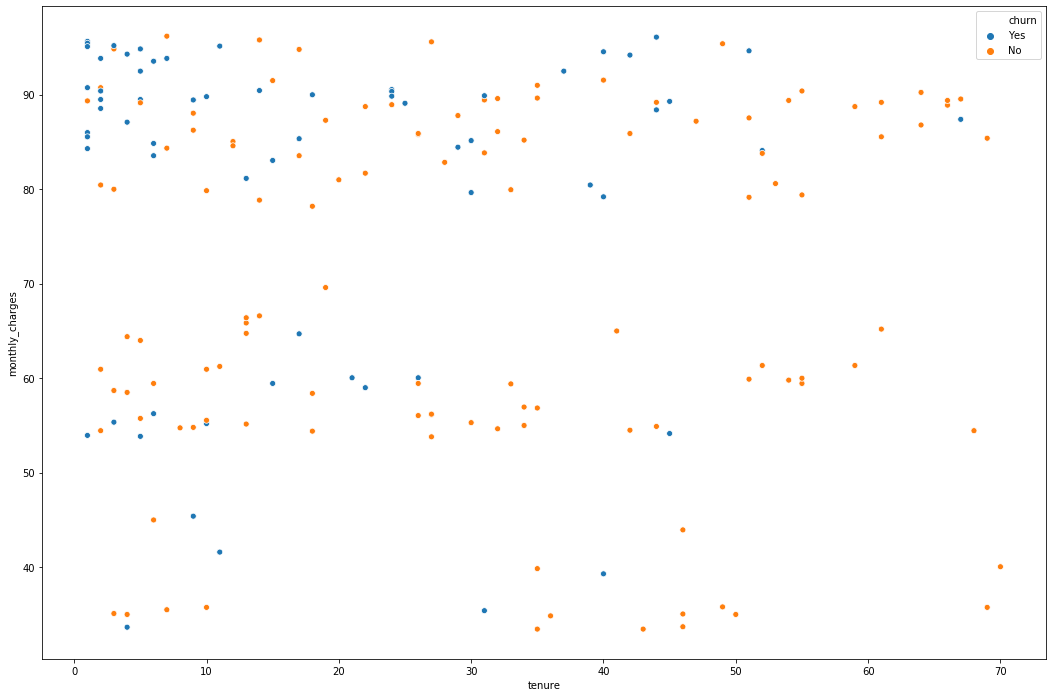

In [10]:
# internet_service == 3
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 3], hue='churn')

- three internet services: 
    - churn rate now exceeds retain rate at all levels

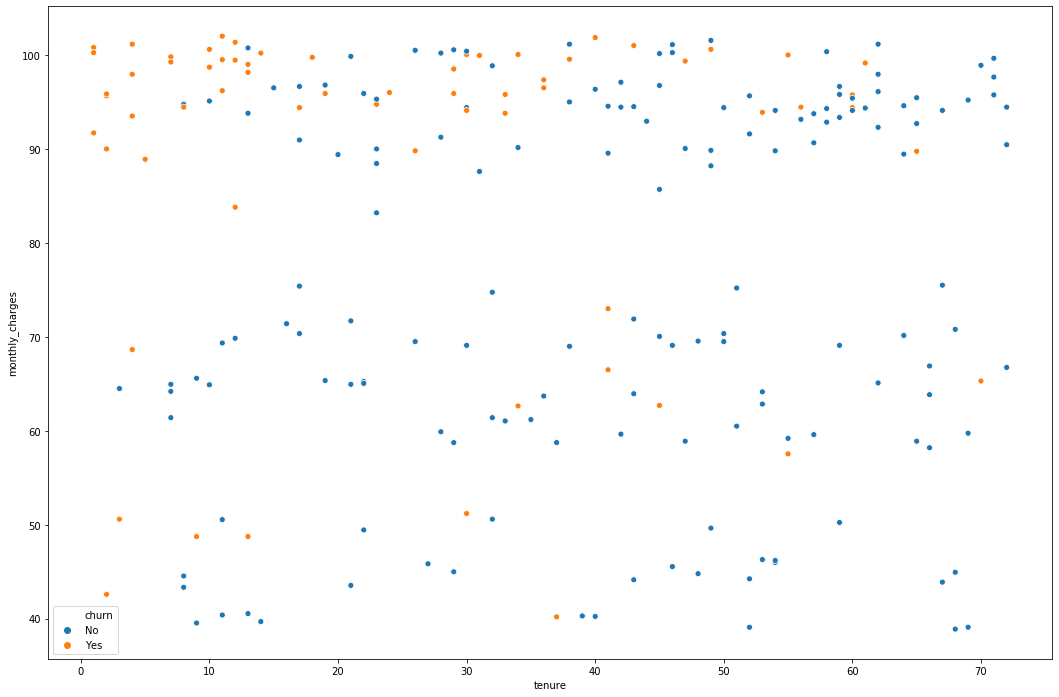

In [11]:
# internet_service == 4
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 4], hue='churn')

- four internet services: 
    - churn rate greatly reduced. 
    - high monthly_charges still has a considerable churn rate
    - but mid and low monthly_charges churn rate has almost ceased

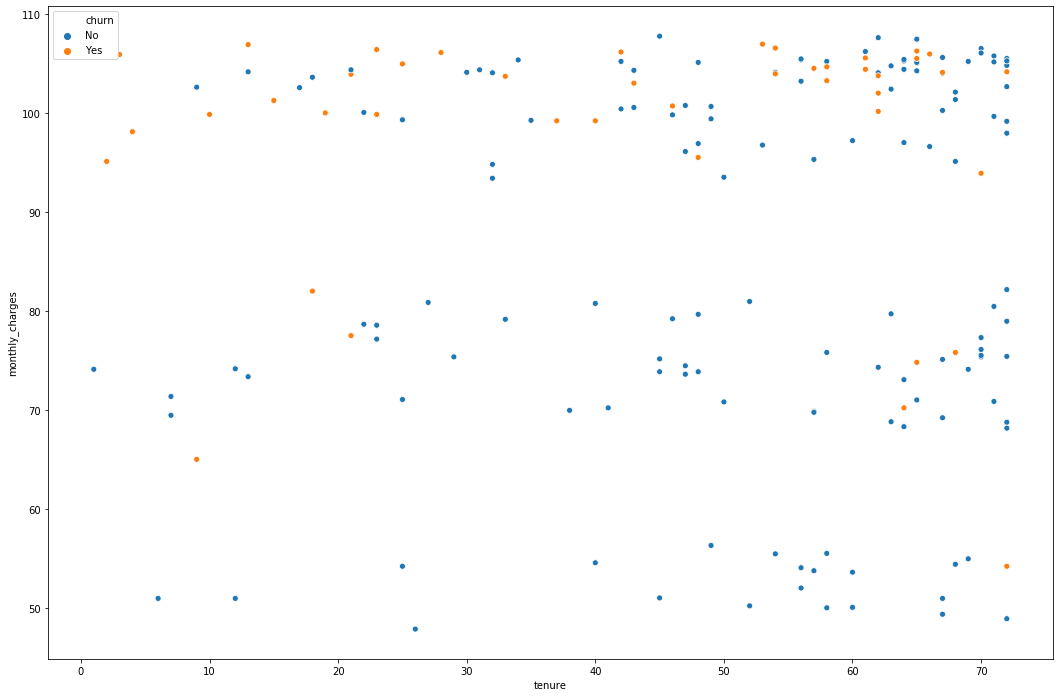

In [12]:
# internet_service == 5
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 5], hue='churn')

- five internet services: 
    - churn rate greatly reduced for lower tenure. 
    - high tenure has a considerable churn rate

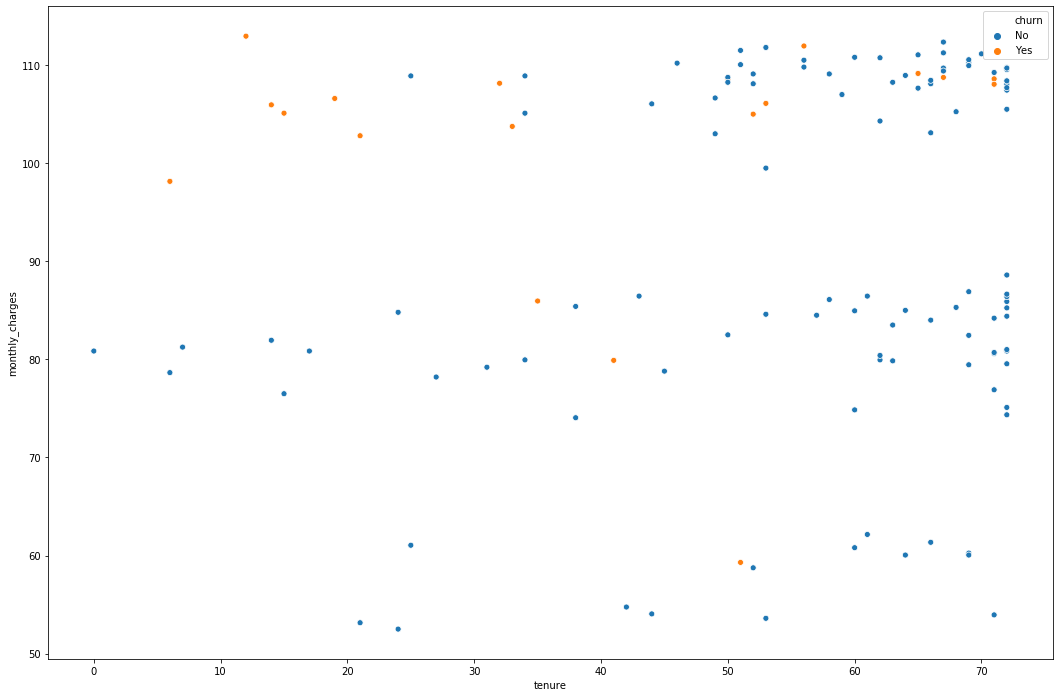

In [13]:
# internet_service == 6
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 6], hue='churn')

- six internet services: 
    - almost all customers at this level has churned

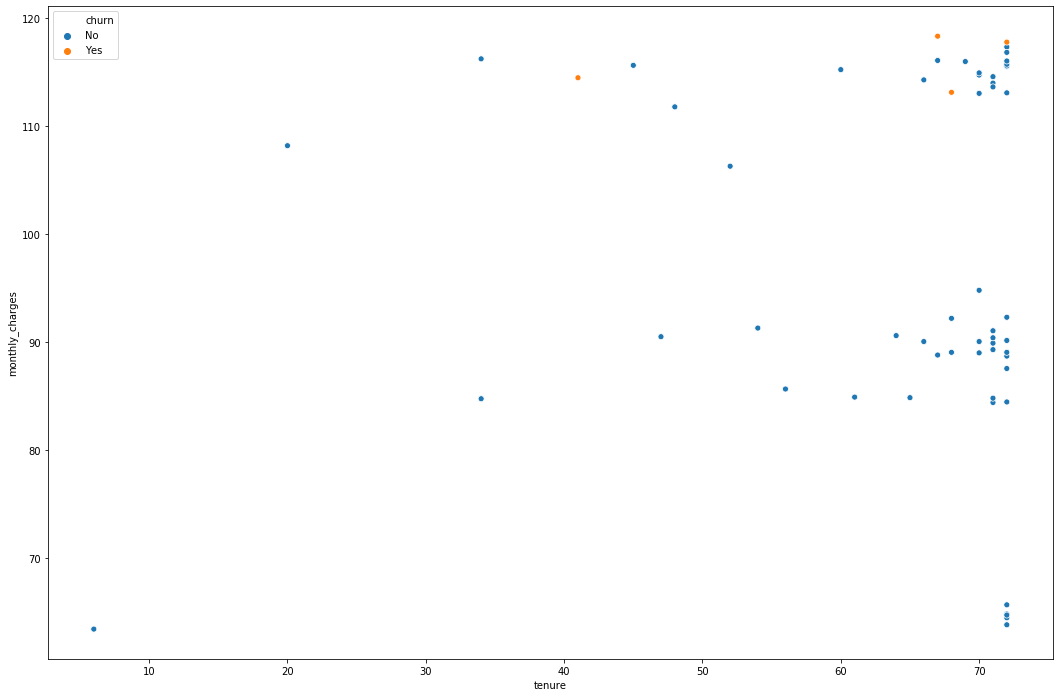

In [14]:
# internet_service == 7
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 7], hue='churn')

- seven internet services: 
    - churn rate is almost non-exsistant at this level

In [15]:
train[train.internet_services == 4]

,Unnamed: 0,customer_id,churn,tenure,tenure_months,tenure_nml,monthly_charges,monthly_charges_nml,total_charges,total_charges_nml,...,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto,monthly_charges_group,tenure_group
15,4665,4083-BFNYK,No,38,3.17,0.191052,95.00,0.864399,3591.25,0.629893,...,0,1,0,0,0,0,1,1,more_then_eighty,four_years
17,4894,8268-YDIXR,No,56,4.67,0.698526,93.15,0.761331,5253.95,1.008648,...,0,0,1,1,0,0,0,0,more_then_eighty,five_years
29,3219,9445-SZLCH,Yes,36,3.00,0.157434,97.35,0.996892,3457.90,0.587436,...,1,0,1,0,0,1,0,1,more_then_eighty,three_years
44,4094,3950-VPYJB,No,57,4.75,0.714776,59.60,-0.250528,3509.40,0.604289,...,0,0,0,0,1,0,0,0,forty_one to sixty,five_years
47,2806,7315-WYOAW,No,13,1.08,-0.472789,100.75,1.180765,1313.25,-0.065389,...,1,1,0,1,0,0,0,0,more_then_eighty,two_years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,3893,0308-IVGOK,No,11,0.92,-0.574460,40.40,-0.636028,422.60,-0.662275,...,0,0,1,0,0,0,1,1,forty_one to sixty,one_year
1396,4554,2014-MKGMH,No,46,3.83,0.375793,101.10,1.203793,4674.40,0.866129,...,1,1,1,1,0,0,0,0,more_then_eighty,four_years
1398,1852,2979-SXESE,Yes,17,1.42,-0.348756,94.40,0.823762,1607.20,0.084445,...,1,0,0,1,0,0,0,0,more_then_eighty,two_years
1399,1918,3217-FZDMN,Yes,8,0.67,-0.714776,94.45,0.827924,742.95,-0.387941,...,1,1,1,0,0,0,1,1,more_then_eighty,one_year


- they asked about tenure cohorts and ppl with different contracts
- monthly charges groups could be created

In [16]:
pd.crosstab(train.tenure_group, train.contract_type)

contract_type,Month-to-month,One year,Two year
tenure_group,,,
five_years,43,65,59
four_years,67,51,36
one_year,399,25,14
six_years,26,62,203
three_years,97,57,17
two_years,128,40,20


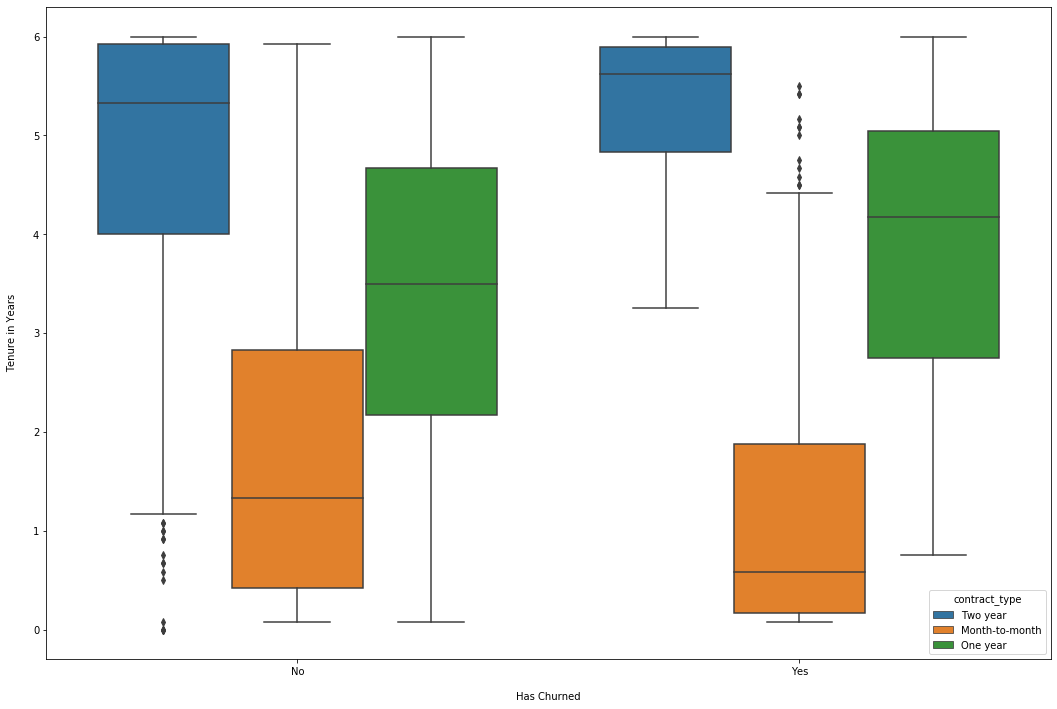

In [17]:
# internet_service == 7
plt.figure(figsize=(18, 12))
sns.boxplot(y='tenure_months', x='churn', data=train, hue='contract_type')
plt.ylabel('Tenure in Years\n')
plt.xlabel('\nHas Churned')
plt.show()

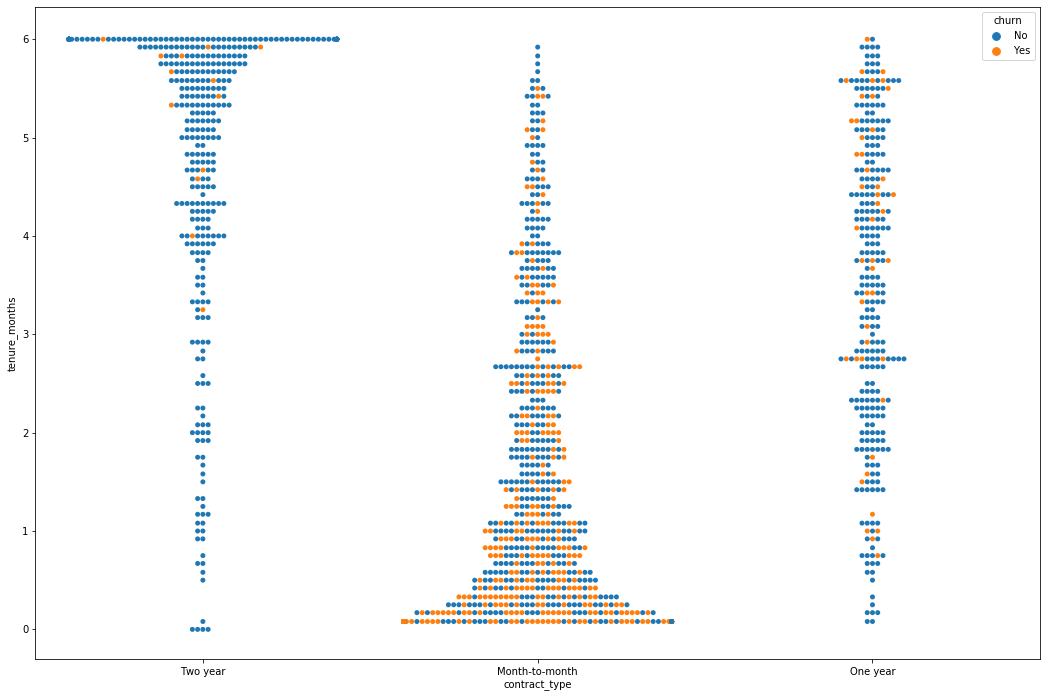

In [18]:
plt.figure(figsize=(18, 12))
# sns.catplot(x='contract_type', y="tenure_months", data=train, hue='churn', kind='swarm');
# plt.show()
sns.swarmplot(x='contract_type', y="tenure_months", data=train, hue='churn');
plt.show()

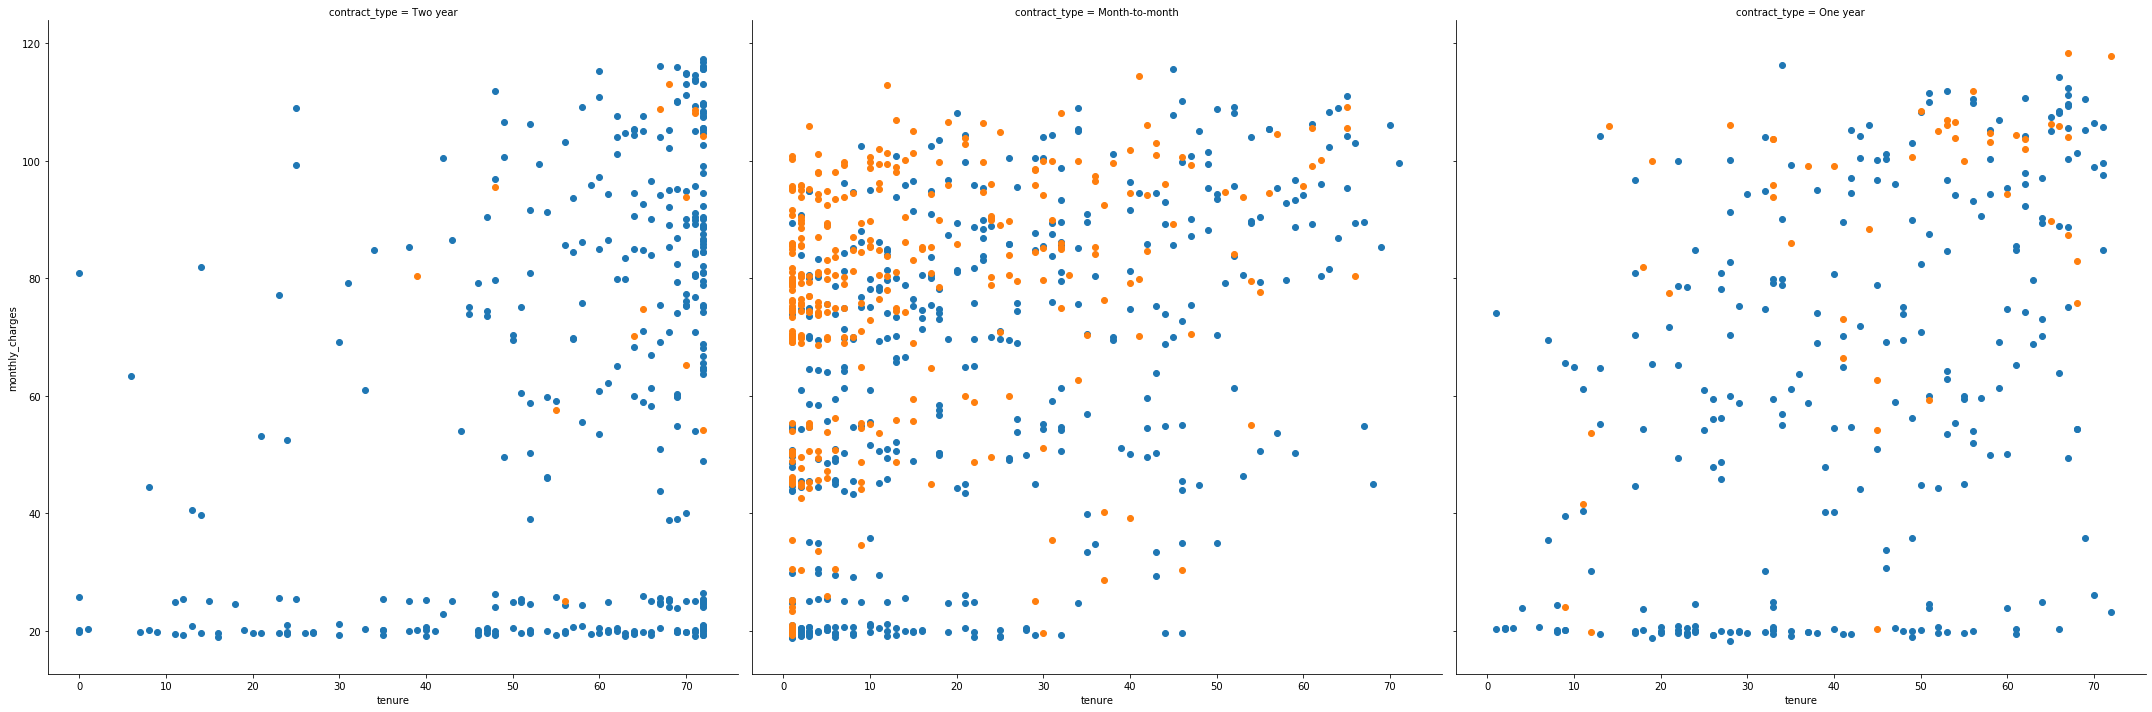

In [19]:
g = sns.FacetGrid(train, col="contract_type", hue='churn', margin_titles=True, height=10)
g.map(plt.scatter, "tenure", "monthly_charges")

In [20]:
# Churn rate by contract type
month_to_month_churn_rate = ((train.churn == 'Yes') & (train.contract_type == 'Month-to-month')).sum() / (train.churn == 'Yes').sum()
one_year_churn_rate = ((train.churn == 'Yes') & (train.contract_type == 'One year')).sum() / (train.churn == 'Yes').sum()
two_year_churn_rate = ((train.churn == 'Yes') & (train.contract_type == 'Two year')).sum() / (train.churn == 'Yes').sum()

print('Churn rates by contract type:')
print('- Month-to-month has a {:.2f}% turn over rate'.format(month_to_month_churn_rate * 100))
print('- One year has a {:.2f}% turn over rate'.format(one_year_churn_rate * 100))
print('- Two has a {:.2f}% turn over rate'.format(two_year_churn_rate * 100))

Churn rates by contract type:
- Month-to-month has a 84.44% turn over rate
- One year has a 11.99% turn over rate
- Two has a 3.57% turn over rate


#### Out of all the customers that have churned, month-to-month contracts have the highest rate

In [21]:
m2m_to20_churn_rate = ((train.churn == 'Yes') & (train.contract_type == 'Month-to-month') & (train.monthly_charges_group == 'zero to twenty')).sum() / (train.churn == 'Yes').sum()
m2m_20to40_churn_rate = ((train.churn == 'Yes') & (train.contract_type == 'Month-to-month') & (train.monthly_charges_group == 'twenty_one to forty')).sum() / (train.churn == 'Yes').sum()
m2m_40to60_churn_rate = ((train.churn == 'Yes') & (train.contract_type == 'Month-to-month') & (train.monthly_charges_group == 'forty_one to sixty')).sum() / (train.churn == 'Yes').sum()
m2m_60to80_churn_rate = ((train.churn == 'Yes') & (train.contract_type == 'Month-to-month') & (train.monthly_charges_group == 'sixty_one to eighty')).sum() / (train.churn == 'Yes').sum()
m2m_over80_churn_rate = ((train.churn == 'Yes') & (train.contract_type == 'Month-to-month') & (train.monthly_charges_group == 'more_then_eighty')).sum() / (train.churn == 'Yes').sum()
m2m_zero_churn_rate = ((train.churn == 'Yes') & (train.contract_type == 'Month-to-month') & (train.monthly_charges_group == 'zero')).sum() / (train.churn == 'Yes').sum()

In [22]:
m2m_to20_churn_rate, m2m_20to40_churn_rate, m2m_40to60_churn_rate, m2m_60to80_churn_rate, m2m_over80_churn_rate, m2m_zero_churn_rate

(0.025510204081632654,
 0.061224489795918366,
 0.12755102040816327,
 0.22448979591836735,
 0.40561224489795916,
 0.0)

In [23]:
m2m_to20_churn_rate + m2m_20to40_churn_rate + m2m_40to60_churn_rate + m2m_60to80_churn_rate + m2m_over80_churn_rate

0.8443877551020409

In [24]:
print('Churn rates by contract type:')
print('- Month-to-month and zero to twenty has a {:.2f}% turn over rate'.format(month_to_month_churn_rate * 100))
print('- One year has a {:.2f}% turn over rate'.format(one_year_churn_rate * 100))
print('- Two has a {:.2f}% turn over rate'.format(two_year_churn_rate * 100))
print('- One year has a {:.2f}% turn over rate'.format(one_year_churn_rate * 100))
print('- Two has a {:.2f}% turn over rate'.format(two_year_churn_rate * 100))

Churn rates by contract type:
- Month-to-month and zero to twenty has a 84.44% turn over rate
- One year has a 11.99% turn over rate
- Two has a 3.57% turn over rate
- One year has a 11.99% turn over rate
- Two has a 3.57% turn over rate
